In [9]:
from docplex.mp.model import Model
import numpy as np
import matplotlib.pyplot as plt

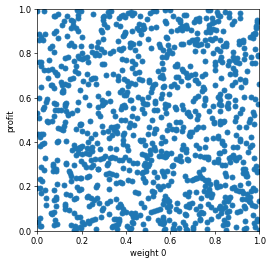

In [10]:
num_items = 1000
num_dimensions = 1
items = np.arange(num_items).reshape(-1, 1)

rand = np.random.default_rng(0)
W = rand.random((num_dimensions, num_items))
p = rand.random(num_items)
b = rand.random(num_items) * num_items / 4

for i in range(num_dimensions):
    plt.figure(dpi=60)
    plt.scatter(W[i], p)
    plt.xlabel(f'weight {i}')
    plt.ylabel('profit')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [11]:
model = Model('Multidimensional_KP')

x = model.binary_var_list(items, name='x')

# capacity constraint
model.add_constraints(W[d] @ x <= b[d] for d in range(num_dimensions))

# objective function
model.maximize(x @ p)

# solve the model
solution = model.solve(log_output=False)

Total profit: 385.5169449531033


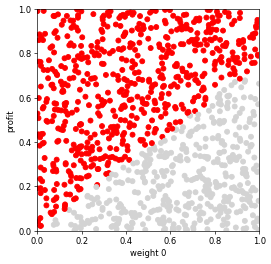

In [12]:
included = solution.get_value_list(x)

print(f'Total profit: {solution.objective_value}')

for d in range(num_dimensions):
    plt.figure(dpi=60)
    plt.scatter(W[d], p, c=['red' if i else 'lightgrey' for i in included])
    plt.xlabel(f'weight {d}')
    plt.ylabel('profit')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.gca().set_aspect('equal', adjustable='box')